---

# Synchornization of EIT data and Isoforce data

In this notebook, the preprocessing of data was processed, making the data possible for training.

the preprocessing pipelinew was followed in order to prepare the data.

this involves few step:

1. Load Isokinetik data from Isoforce source
2. Load Isokinetik data from NI card recorded by python
3. Load EIT data and take the corressponding EIT frames

---


## Import Libraries

---

In [4]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from toolbox import Protocol
from toolbox import data_sync
from pre_processing.eit_utils import load_eit_npz

---

# Step 1 : Extract Torque Segments

As an example, the synchronization is done for `P03`, the other Participants followed the same procedure.

here, firstly the torque segments from both sources loaded and visualized for better understanding the relation ship between them.

---

In [7]:
path = "/Users/MA_Arash/MA_git/EIT_Thigh_Force_Estimation/Final_Measurements/P15"

## Hyper Parameters
SEGMENT_LEN_THRESHOLD =100
DISTANCE = 400

Applying low-pass filter to torque and angle data.
Force levels: [60 60 50 50 20 20 30 30 80 80 70 70 40 40]


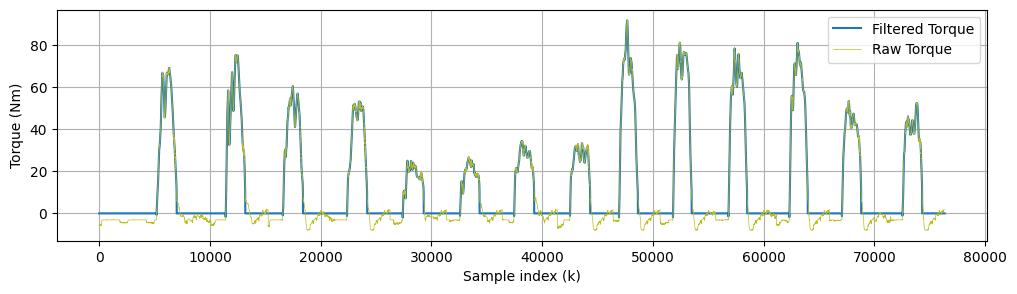

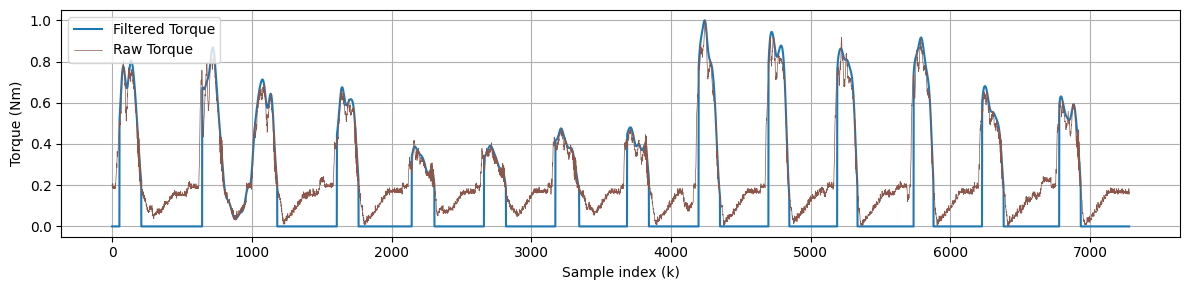

In [8]:
iso_force_iso, iso_force_py = data_sync.process_isoforce_data(data_path=path,  segment_length_threshold=SEGMENT_LEN_THRESHOLD, distance=DISTANCE)

## Observation
- One more time , it can be conclude that all segments from both source can be extracted can be used for synchronization

---
# Step 2. Synchronization
This step contains cheking the number of segments from both sources first.
Afterwards, by using `sync_NI_PY_times` all segments from all segments are plotted at the same plot.

---

In [11]:
# check the number of Segements detected
print("# of IsoForce segments :",len(iso_force_iso.torque_segments))
print("")
print("# of NI segments: ",len(iso_force_py.torque_segments))

# of IsoForce segments : 14

# of NI segments:  14


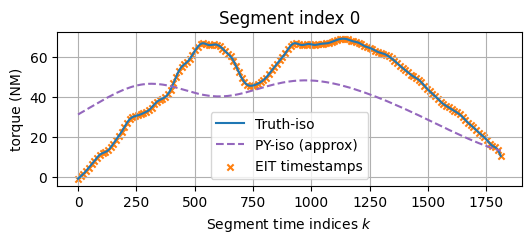

In [12]:
tmp_ts_seg, sampled_iso = data_sync.sync_NI_PY_times(iso_force_iso, iso_force_py)

## Observation

With a quick look, it can be confirmed that the torque data between EIT and Isoforce has the same behavior.
only few notes shuld keep in mind. As the formular of scaling factor and offset was not available for NI card, the signal was scaled to 0-1 and here for visualization approximately multipled to have the feeeling of this step.

Afterwards, the orange sample represents the EIT frames that matched to the Isoforce data

---

# Step 3: Check the timestamps betwen EIT and Iso

---

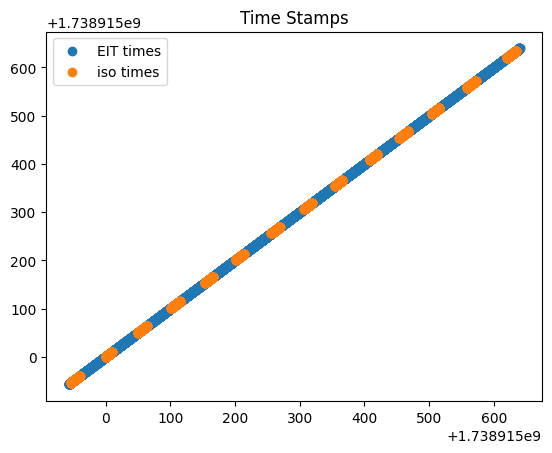

In [14]:
eit_times, _ = load_eit_npz(path)
iso_times = iso_force_py.timestamps
plt.scatter(eit_times[::2], eit_times[::2], label="EIT times")
plt.scatter(iso_times[::2], iso_times[::2], label="iso times")
plt.title("Time Stamps")
plt.legend()
plt.show()

---
## Step 4. Starting Sequence Matching
Now `synchronize_eit_force_data` is responsible for handling the sequence matching for all trials and the results has been shown in following cell

---

Loading EIT data...
Matching segments...


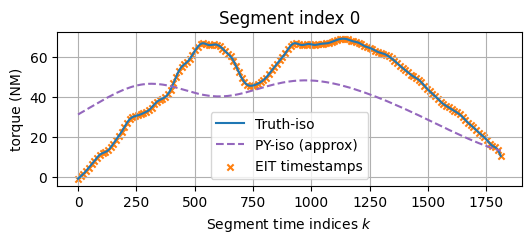

Sync Start Index: 174, Time Difference Start: 0.003000020980834961, Time Difference End: 0.003000020980834961


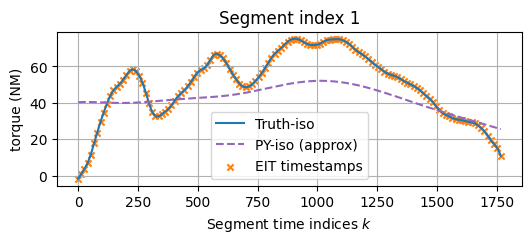

Sync Start Index: 2366, Time Difference Start: 0.006000041961669922, Time Difference End: 0.006000041961669922


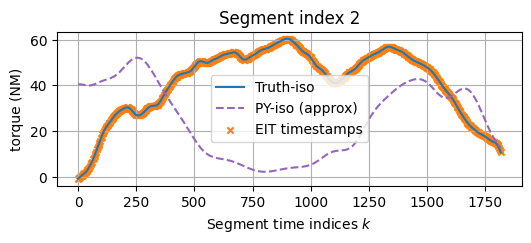

Sync Start Index: 2366, Time Difference Start: 0.006000041961669922, Time Difference End: 0.00800013542175293


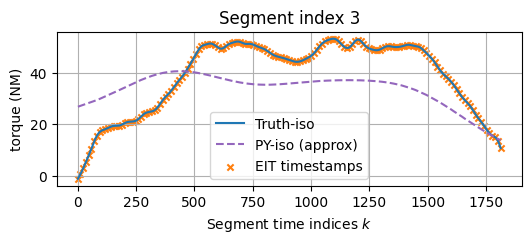

Sync Start Index: 6410, Time Difference Start: 0.010999917984008789, Time Difference End: 0.01100015640258789


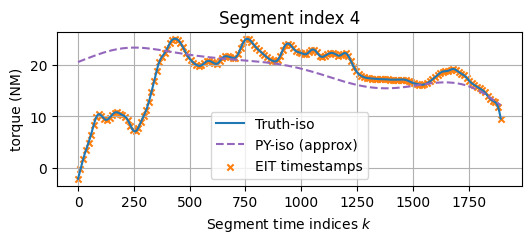

Sync Start Index: 8467, Time Difference Start: -0.012000083923339844, Time Difference End: -0.011999845504760742


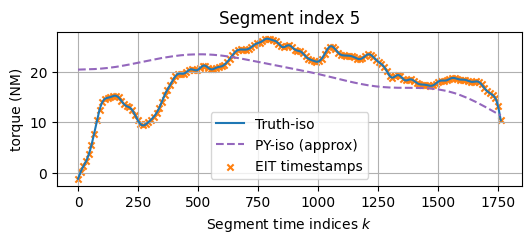

Sync Start Index: 10384, Time Difference Start: -0.009999990463256836, Time Difference End: -0.009000062942504883


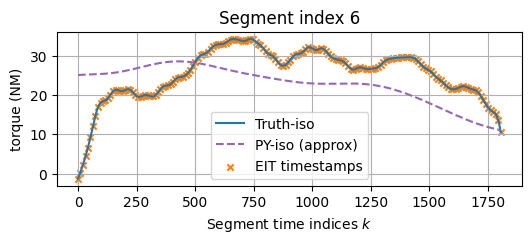

Sync Start Index: 12575, Time Difference Start: -0.006999969482421875, Time Difference End: -0.006999969482421875


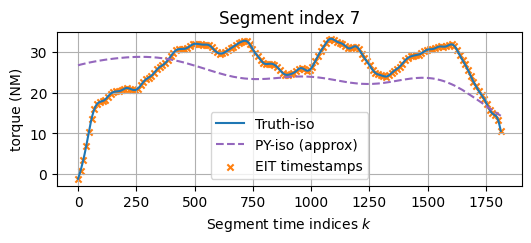

Sync Start Index: 14568, Time Difference Start: -0.003999948501586914, Time Difference End: -0.003999948501586914


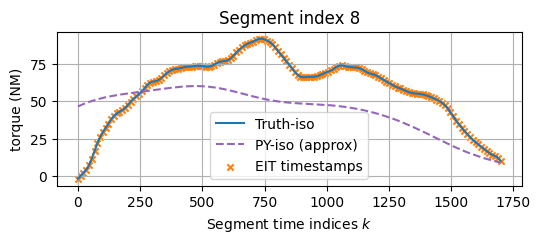

Sync Start Index: 16480, Time Difference Start: -0.0019998550415039062, Time Difference End: -0.002000093460083008


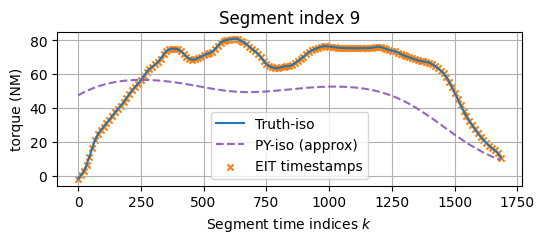

Sync Start Index: 18660, Time Difference Start: 0.0010001659393310547, Time Difference End: 0.0010001659393310547


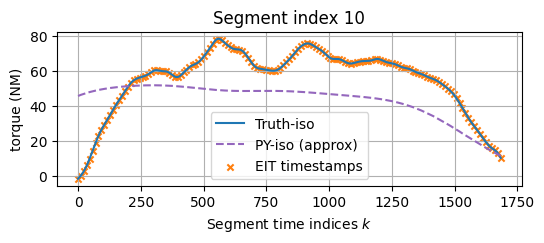

Sync Start Index: 20512, Time Difference Start: 0.003999948501586914, Time Difference End: 0.003999948501586914


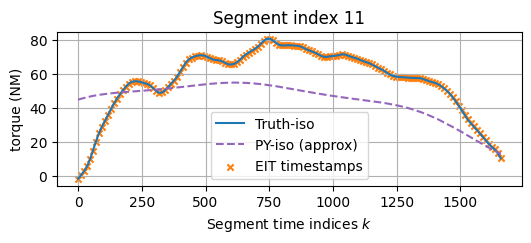

Sync Start Index: 22499, Time Difference Start: 0.006000041961669922, Time Difference End: 0.006000041961669922


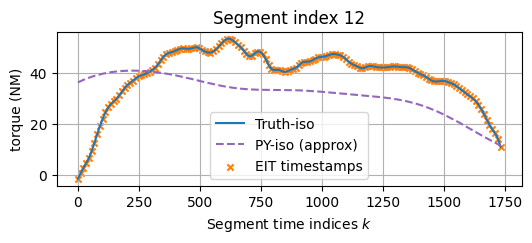

Sync Start Index: 24669, Time Difference Start: 0.009000062942504883, Time Difference End: 0.009000062942504883


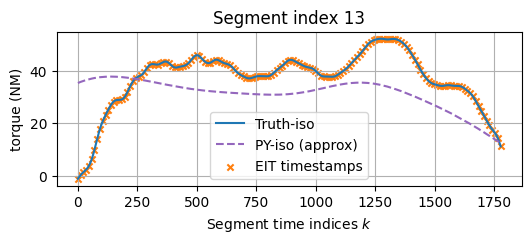

Sync Start Index: 27141, Time Difference Start: 0.011999845504760742, Time Difference End: -0.012000083923339844


In [15]:
EIT, TORQUE, TS_iso, TS_eit = data_sync.synchronize_eit_force_data(path, iso_force_iso, iso_force_py, protocol=Protocol)

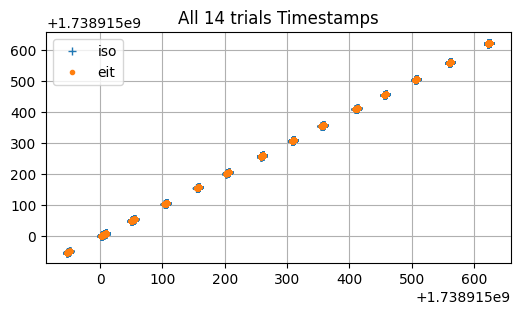

In [17]:
plt.figure(figsize=(6, 3))
plt.plot(TS_iso, TS_iso, "+", label="iso")
plt.plot(TS_eit, TS_eit, ".", label="eit")
plt.title("All 14 trials Timestamps")
plt.legend()
plt.grid()
plt.show()

In [18]:
print(EIT.shape, TORQUE.shape, TS_iso.shape, TS_eit.shape)


(2522, 16, 16) (2522,) (2522,) (2522,)


# My observation:

- P01 only has overlapping timestamps